## Assignment No. 11-Q2
#### Problem Statement:

#### Extract reviews of any product from ecommerce website like amazon
#### Perform emotion mining

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import requests
from bs4 import BeautifulSoup

# IMDB Movie reviews

In [66]:
# Extracting the movie reviews from IMDB website

url = "http://www.imdb.com/title/tt3521164/reviews?ref_=tt_urv"
resp = requests.get(url)
print(resp.status_code)
#print(resp.content)
soup = BeautifulSoup(resp.text,"html.parser")
#soup.prettify()


200


In [67]:
reviews = soup.findAll("div", attrs={"class","text"})
print(type(reviews))
for i in range(len(reviews)):
    reviews[i] = reviews[i].text

<class 'bs4.element.ResultSet'>


In [68]:
# Creating a data frame 
import pandas as pd
movie_reviews = pd.DataFrame(reviews, columns = ["reviews"])
movie_reviews

,reviews
0,"""Moana"" is the latest full length animated fil..."
1,"Despite being a lifelong Disney fan, that is n..."
2,I'm not the target market for these Disney ani...
3,Moana (2016) *** 1/2 (out of 4)Beautiful looki...
4,Moana is told the story of Maui (Dwayne Johnso...
5,"This is a very well done animated feature, usi..."
6,I have been a bit leery of DIsney Princess mov...
7,"Set on the Polynesian island of Motunui, the l..."
8,It was my daughter that meant I watched this f...
9,The chief's daughter Moana (Auli'i Cravalho) m...


In [69]:
movie_reviews.shape

(25, 1)

# Text Mining

In [70]:
import string 
import spacy
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing the text

In [71]:
movie_reviews = [reviews.strip() for reviews in movie_reviews.reviews]

In [72]:
movie_reviews = [reviews for reviews in movie_reviews if reviews]           # removing the empty strings from the data
movie_reviews[0:25]

['"Moana" is the latest full length animated film from Disney and it\'s a worthy successor to its last CGI success, "Zootopia". While the film isn\'t perfect, it is very enjoyable and original.The story in "Moana" is based y loosely on Polynesian folklore\x85in particular, their trickster demigod, Maui (Dwayne Johnson). Because of Maui\'s actions, nature is very slowly dying off and ruin is coming for Moana and her people. However, Moana\'s father, the Chief, is afraid of what lies beyond their island and forbids Moana from leaving on a journey to try to restore the lost heart to the Island Mother. Using pluck and determination, and with a bit of help from Maui, Moana makes this journey. This synopsis might sound very strange and confusing\x85and it\'s best you just see the film for yourself. Suffice to say, it is a real crowd pleaser due to an interesting, stunning computer animation and very original story as well as some interesting characters. I particularly liked Moana as she was 

In [73]:
# joining the list of comments into a single text/string

text = ' '.join(movie_reviews)

In [74]:
len(text)

39143

## Removing punctuations 

In [75]:
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Moana is the latest full length animated film from Disney and its a worthy successor to its last CGI success Zootopia While the film isnt perfect it is very enjoyable and originalThe story in Moana is based y loosely on Polynesian folklore\x85in particular their trickster demigod Maui Dwayne Johnson Because of Mauis actions nature is very slowly dying off and ruin is coming for Moana and her people However Moanas father the Chief is afraid of what lies beyond their island and forbids Moana from leaving on a journey to try to restore the lost heart to the Island Mother Using pluck and determination and with a bit of help from Maui Moana makes this journey This synopsis might sound very strange and confusing\x85and its best you just see the film for yourself Suffice to say it is a real crowd pleaser due to an interesting stunning computer animation and very original story as well as some interesting characters I particularly liked Moana as she was strong and likable\x85and not someone n

## Tokenization

In [76]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
tokens = word_tokenize(no_punc_text)
tokens[0:25]

['Moana',
 'is',
 'the',
 'latest',
 'full',
 'length',
 'animated',
 'film',
 'from',
 'Disney',
 'and',
 'its',
 'a',
 'worthy',
 'successor',
 'to',
 'its',
 'last',
 'CGI',
 'success',
 'Zootopia',
 'While',
 'the',
 'film',
 'isnt']

In [78]:
len(tokens)

6872

## Removing Stopwords

In [79]:
from nltk.corpus import stopwords
nltk.download('punkt')      
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
text_stopwords = stopwords.words("english")
text_stopwords.append('an')
no_stop_words = [word for word in tokens if not word in text_stopwords]
no_stop_words[:25]

['Moana',
 'latest',
 'full',
 'length',
 'animated',
 'film',
 'Disney',
 'worthy',
 'successor',
 'last',
 'CGI',
 'success',
 'Zootopia',
 'While',
 'film',
 'isnt',
 'perfect',
 'enjoyable',
 'originalThe',
 'story',
 'Moana',
 'based',
 'loosely',
 'Polynesian',
 'folklore']

## Normalizing the text(converting all the text to lower case)

In [81]:
lower_words = [text.lower() for text in no_stop_words]
lower_words[0:25]

['moana',
 'latest',
 'full',
 'length',
 'animated',
 'film',
 'disney',
 'worthy',
 'successor',
 'last',
 'cgi',
 'success',
 'zootopia',
 'while',
 'film',
 'isnt',
 'perfect',
 'enjoyable',
 'originalthe',
 'story',
 'moana',
 'based',
 'loosely',
 'polynesian',
 'folklore']

## Stemming 

In [82]:
from nltk.stem import PorterStemmer

In [83]:
ps = PorterStemmer()

In [84]:
stem_words = [ps.stem(word) for word in lower_words]
stem_words[0:25]

['moana',
 'latest',
 'full',
 'length',
 'anim',
 'film',
 'disney',
 'worthi',
 'successor',
 'last',
 'cgi',
 'success',
 'zootopia',
 'while',
 'film',
 'isnt',
 'perfect',
 'enjoy',
 'originalth',
 'stori',
 'moana',
 'base',
 'loos',
 'polynesian',
 'folklor']

## Lemmatization

In [85]:
nlp = spacy.load("en_core_web_sm")

In [86]:
# joining the stopwords into a paragraph

doc = nlp(' '.join(no_stop_words))
doc[0:25]

Moana latest full length animated film Disney worthy successor last CGI success Zootopia While film isnt perfect enjoyable originalThe story Moana based loosely Polynesian

In [87]:
lemmas = [token.lemma_ for token in doc]
lemmas[:25]

['Moana',
 'late',
 'full',
 'length',
 'animate',
 'film',
 'Disney',
 'worthy',
 'successor',
 'last',
 'CGI',
 'success',
 'Zootopia',
 'while',
 'film',
 'be',
 'not',
 'perfect',
 'enjoyable',
 'originalThe',
 'story',
 'Moana',
 'base',
 'loosely',
 'polynesian']

## POS tagging

In [88]:
one_block = movie_reviews[15]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [89]:
# getting the tokens and pos tags for the tokens

for tokens in doc_block[0:25]:
    print(tokens,tokens.pos_)

Disney PROPN
really ADV
seem VERB
to PART
be AUX
on ADP
a DET
run NOUN
of ADP
good ADJ
form NOUN
with ADP
their DET
Animated VERB
Classics NOUN
( PUNCT
Wreck VERB
it PRON
Ralph PROPN
1 NUM
and CCONJ
2 NUM
aside ADV
) PUNCT
and CCONJ


In [90]:
# extracting the nouns and verbs
noun_verbs = [token.text for token in doc_block if token.pos_ in ("NOUN","VERB")]
print(noun_verbs[0:25])

['seem', 'run', 'form', 'Animated', 'Classics', 'Wreck', 'entry', 'story', 'humour', 'will', 'appeal', 'children', 'adults', 'songs', 'way', 'watching']


In [91]:
# getting the word count

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(noun_verbs)
sum_words = X.sum(axis = 0)
word_freq = [(word, sum_words[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
wf_df= pd.DataFrame(word_freq)
wf_df.columns = ['words', 'count']
wf_df[0:15]

,words,count
0,seem,1
1,run,1
2,form,1
3,animated,1
4,classics,1
5,wreck,1
6,entry,1
7,story,1
8,humour,1
9,will,1


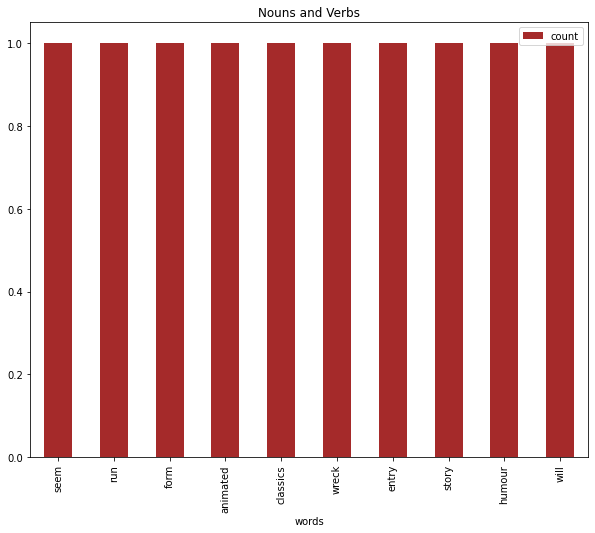

In [94]:
wf_df[0:10].plot.bar(x = 'words', title = 'Nouns and Verbs', figsize = (10,8),color = 'brown');

# Sentiment Analysis

In [95]:
afinn = pd.read_csv("/content/drive/MyDrive/Datasets/Text Mining/Afinn.csv", encoding='latin-1')

In [96]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [97]:
afinn.shape

(2477, 2)

In [98]:
from itertools import islice

def take(n,iterable):
    return list(islice(iterable, n))

In [99]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [100]:
take(15,affinity_scores)

['abandon',
 'abandoned',
 'abandons',
 'abducted',
 'abduction',
 'abductions',
 'abhor',
 'abhorred',
 'abhorrent',
 'abhors',
 'abilities',
 'ability',
 'aboard',
 'absentee',
 'absentees']

In [101]:
from nltk import tokenize

In [102]:
sentence = tokenize.sent_tokenize(' '.join(movie_reviews))
sentence[5:15]

["This synopsis might sound very strange and confusing\x85and it's best you just see the film for yourself.",
 'Suffice to say, it is a real crowd pleaser due to an interesting, stunning computer animation and very original story as well as some interesting characters.',
 'I particularly liked Moana as she was strong and likable\x85and not someone needing rescuing.',
 "But she also wasn't harsh or stereotypical\x85just determined.",
 "I also loved her pet sidekick, as this chicken is nothing like any Disney sidekick\x85and you'll soon realize this animal is possibly the dumbest in Disney history\x85as well as very funny.. As for Dwayne Johnson ('The Rock') he was also very good\x85and I was surprised that he had a decent singing voice in the film.",
 'As for the singing in general, however, this is the weakest aspect of the film.',
 'While most of the songs are enjoyable, a few are quite forgettable and none have that singability you look for in a full-length Disney cartoon.',
 "You'll

In [103]:
sent_df = pd.DataFrame(sentence, columns = ['sentences'])
sent_df

,sentences
0,"""Moana"" is the latest full length animated fil..."
1,"While the film isn't perfect, it is very enjoy..."
2,"Because of Maui's actions, nature is very slow..."
3,"However, Moana's father, the Chief, is afraid ..."
4,"Using pluck and determination, and with a bit ..."
...,...
274,.
275,weren't.
276,"The songs are good, the animation's beautiful,..."
277,"Having said that, you could do with a lot worse."


In [104]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

In [105]:
def calculate_sentiment(text: str = None)->float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [106]:
calculate_sentiment("never poor")

-2

In [107]:
# Getting the word count from sentences

sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)
sent_df['word_count'].head(25)

0     21
1     29
2     19
3     32
4     16
5     18
6     26
7     15
8      9
9     58
10    15
11    25
12    29
13    28
14    28
15    17
16    20
17    40
18    63
19    25
20    34
21    46
22    71
23    17
24    27
Name: word_count, dtype: int64

In [108]:
sent_df['sentiment_scores'] = sent_df['sentences'].apply(calculate_sentiment)
sent_df

,sentences,word_count,sentiment_scores
0,"""Moana"" is the latest full length animated fil...",21,4
1,"While the film isn't perfect, it is very enjoy...",29,3
2,"Because of Maui's actions, nature is very slow...",19,-5
3,"However, Moana's father, the Chief, is afraid ...",32,-5
4,"Using pluck and determination, and with a bit ...",16,2
...,...,...,...
274,.,1,0
275,weren't.,1,0
276,"The songs are good, the animation's beautiful,...",28,8
277,"Having said that, you could do with a lot worse.",10,-3


In [109]:
sent_df.sort_values(by = 'sentiment_scores').tail(20)

,sentences,word_count,sentiment_scores
18,"Of the ""2nd Renaissance""/""Disney Revival"" peri...",63,8
108,Instead it gets the tone completely correct in...,47,8
183,Disney really seem to be on a run of good form...,53,8
111,It is a great line a in a great song and it sp...,37,9
213,And it is a delight to hear Dwayne Johnson tak...,73,9
9,"I also loved her pet sidekick, as this chicken...",58,9
211,"Enchanting as a child, and engaging as a curio...",29,9
205,It's nice to see a spunky female heroine of co...,51,9
21,Disney's best-looking film in a long time and ...,46,9
214,"The land locations are vibrant and detailed, t...",43,9


In [110]:
sent_df['sentiment_scores'].describe()

count    279.000000
mean       1.756272
std        4.186062
min      -17.000000
25%        0.000000
50%        1.000000
75%        3.500000
max       35.000000
Name: sentiment_scores, dtype: float64

In [111]:
sent_df[sent_df['sentiment_scores']>=15]

,sentences,word_count,sentiment_scores
136,"The animation is fantastic, it is good to have...",62,35


In [112]:
sent_df[sent_df['sentiment_scores']<0]

,sentences,word_count,sentiment_scores
2,"Because of Maui's actions, nature is very slow...",19,-5
3,"However, Moana's father, the Chief, is afraid ...",32,-5
8,But she also wasn't harsh or stereotypical jus...,9,-2
10,"As for the singing in general, however, this i...",15,-2
19,"It was however difficult to fault 'Moana', bec...",25,-1
20,There have been criticisms regarding a formula...,34,-9
29,"There is something for everybody, never too co...",26,-3
34,"If anybody does find him dumb or annoying, thi...",33,-7
39,"As usual, the slick and soulless animation sty...",47,-2
42,"As a teen, Moana's island comes under a curse ...",27,-1


In [113]:
# Visualizing the sentiment scores

In [114]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

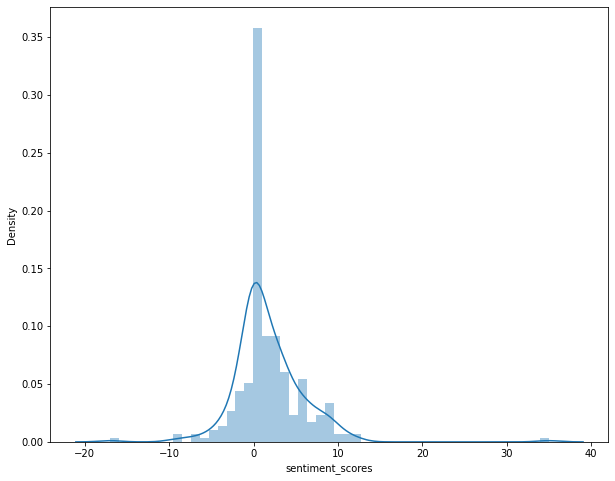

In [115]:
plt.figure(figsize = (10,8))
sns.distplot(sent_df['sentiment_scores'])

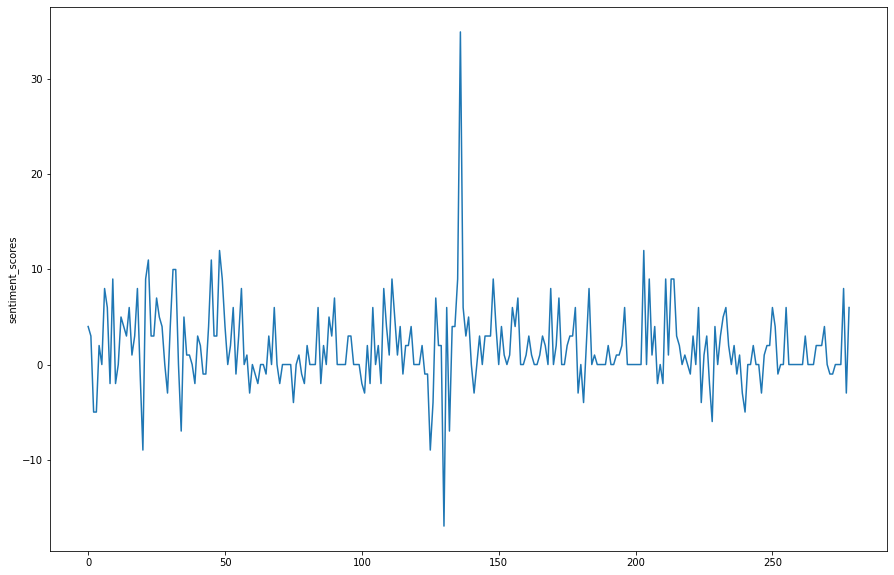

In [116]:
plt.figure(figsize=(15,10))
sns.lineplot(x = sent_df.index, y = sent_df['sentiment_scores'], data = sent_df)

Inference : The maximum score we are having is 16 and minimum is -9

In [117]:
string = " ".join(sent_df["sentences"])

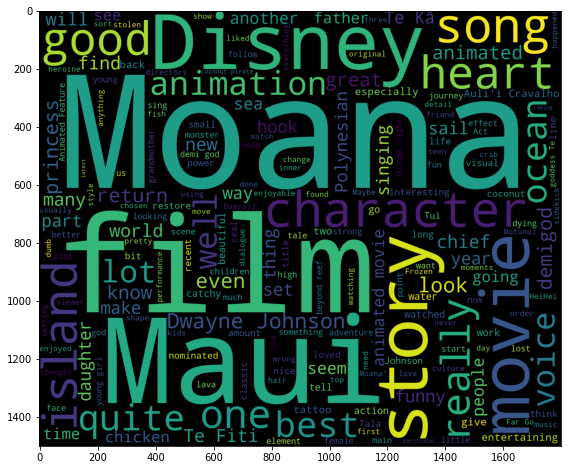

In [118]:
from wordcloud import WordCloud
plt.figure(figsize = (15,8))
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string)
plt.imshow(wordcloud_stw)